In [6]:
import pandas as pd
import pyfixest as pf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/candy-data.csv")

### Run regression

In [3]:
formula = "winpercent ~ chocolate + fruity + caramel + peanutyalmondy + nougat + crispedricewafer + hard + bar + pluribus + sugarpercent + pricepercent"

In [9]:
model = pf.feols(formula, data=df)
model.summary()

###

Estimation:  OLS
Dep. var.: winpercent, Fixed effects: 0
Inference:  iid
Observations:  85

| Coefficient      |   Estimate |   Std. Error |   t value |   Pr(>|t|) |    2.5% |   97.5% |
|:-----------------|-----------:|-------------:|----------:|-----------:|--------:|--------:|
| Intercept        |     34.534 |        4.320 |     7.994 |      0.000 |  25.924 |  43.144 |
| chocolate        |     19.748 |        3.899 |     5.065 |      0.000 |  11.978 |  27.518 |
| fruity           |      9.422 |        3.763 |     2.504 |      0.015 |   1.923 |  16.922 |
| caramel          |      2.224 |        3.657 |     0.608 |      0.545 |  -5.065 |   9.514 |
| peanutyalmondy   |     10.071 |        3.616 |     2.785 |      0.007 |   2.864 |  17.277 |
| nougat           |      0.804 |        5.716 |     0.141 |      0.888 | -10.588 |  12.197 |
| crispedricewafer |      8.919 |        5.268 |     1.693 |      0.095 |  -1.580 |  19.418 |
| hard             |     -6.165 |        3.455 |    -1.78

In [ ]:
pf.etable(model, signif_code=[0.01, 0.05, 0.1])

GT(_tbl_data=   level_0             level_1                       0
0     coef           chocolate  19.748*** <br> (3.899)
1     coef              fruity    9.422** <br> (3.763)
2     coef             caramel      2.224 <br> (3.657)
3     coef      peanutyalmondy  10.071*** <br> (3.616)
4     coef              nougat      0.804 <br> (5.716)
5     coef    crispedricewafer     8.919* <br> (5.268)
6     coef                hard    -6.165* <br> (3.455)
7     coef                 bar      0.442 <br> (5.061)
8     coef            pluribus     -0.854 <br> (3.040)
9     coef        sugarpercent     9.087* <br> (4.659)
10    coef        pricepercent     -5.928 <br> (5.513)
11    coef           Intercept  34.534*** <br> (4.320)
12   stats        Observations                      85
13   stats           S.E. type                     iid
14   stats       R<sup>2</sup>                   0.540
15   stats  Adj. R<sup>2</sup>                   0.471, _body=<great_tables._gt_data.Body object at 0x00000230F8AE6C60>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x00000230F8AE7DD0>, _spanners=Spanners([SpannerInfo(spanner_id='winpercent', spanner_level=1, spanner_label='winpercent', spanner_units=None, spanner_pattern=None, vars=['0'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.1, ** p < 0.05, *** p < 0.01. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x00000230F8AE6780>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='val

### Present results

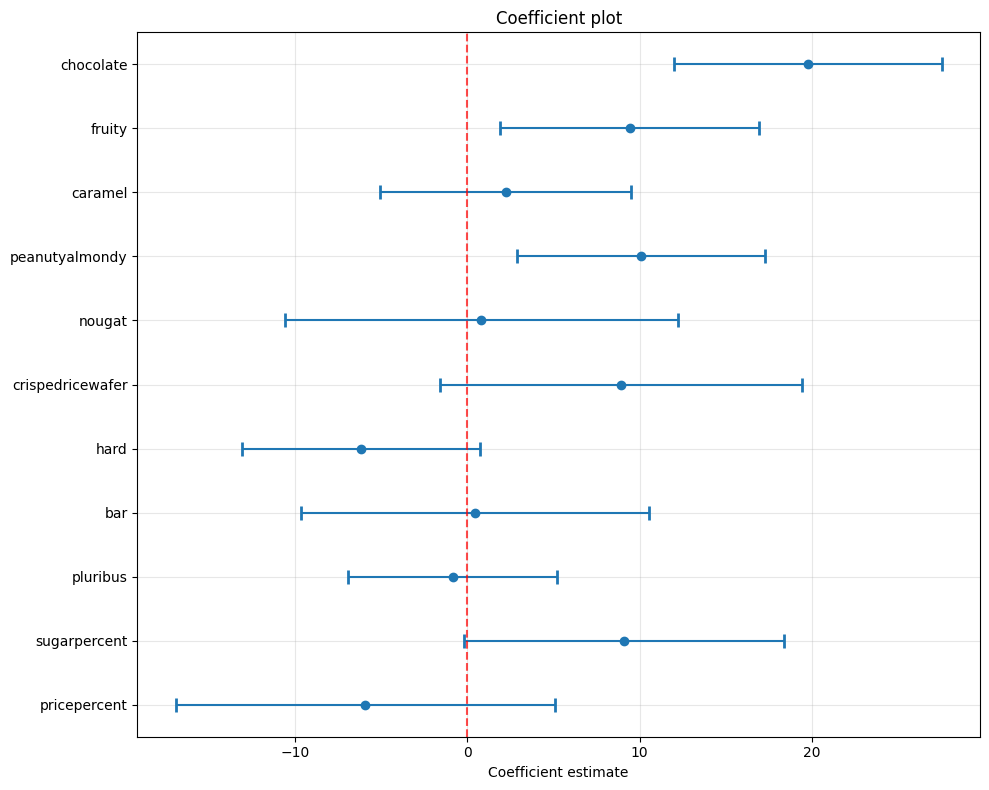

In [15]:
# coefplot
coeffs = model.coef().drop("Intercept").iloc[::-1]
conf_int = model.confint().drop("Intercept").iloc[::-1]

fig, ax = plt.subplots(figsize=(10, 8))

y_pos = range(len(coeffs))
ax.errorbar(
    coeffs.values,
    y_pos,
    xerr=[coeffs.values - conf_int.iloc[:, 0], conf_int.iloc[:, 1] - coeffs.values],
    fmt="o",
    capsize=5,
    capthick=2,
)
ax.axvline(x=0, color="red", linestyle="--", alpha=0.7)
ax.set_yticks(y_pos)
ax.set_yticklabels(coeffs.index)
ax.set_xlabel("Coefficient estimate")
ax.set_title("Coefficient plot")
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Diagnostics

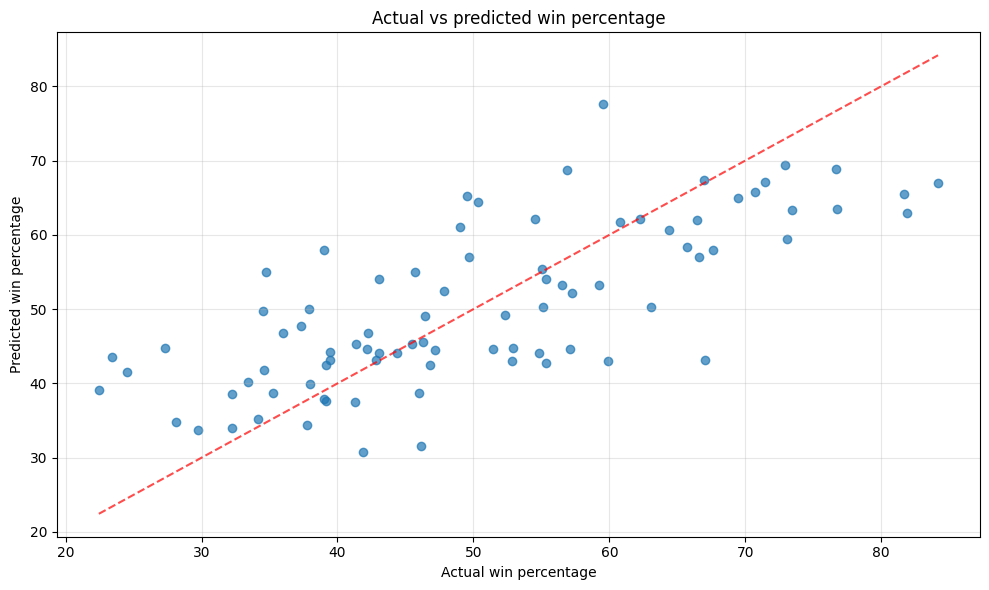

In [30]:
# actual vs predicted plot
fitted_values = model.predict(df.drop(columns=["competitorname", "winpercent"]))

plt.figure(figsize=(10, 6))
plt.scatter(
    df["winpercent"],
    fitted_values,
    alpha=0.7,
)
plt.plot(
    [df["winpercent"].min(), df["winpercent"].max()],
    [df["winpercent"].min(), df["winpercent"].max()],
    color="red",
    linestyle="--",
    alpha=0.7,
)
plt.xlabel("Actual win percentage")
plt.ylabel("Predicted win percentage")
plt.title("Actual vs predicted win percentage")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Residuals

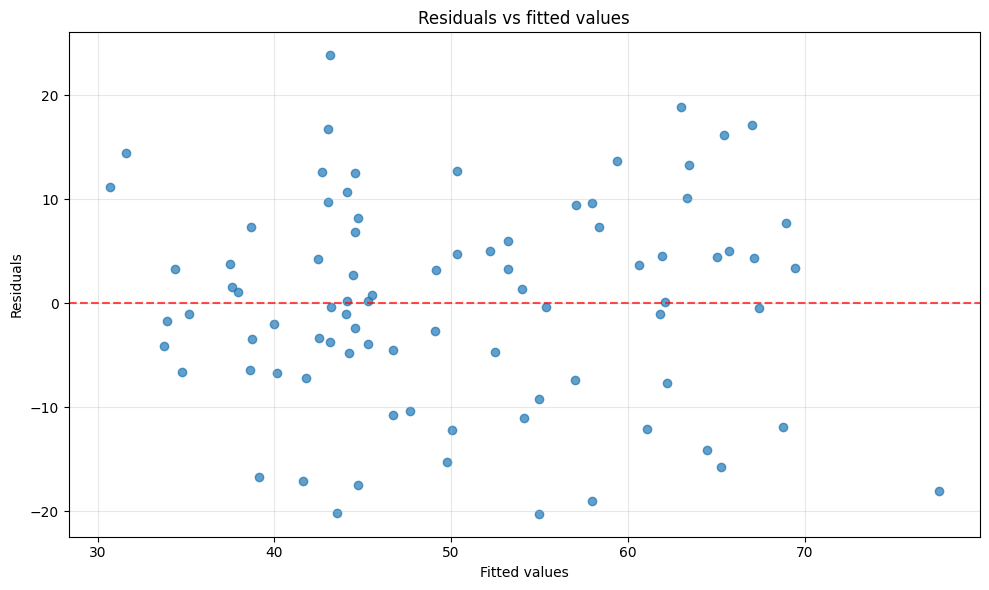

In [ ]:
# residual vs fitted values plot
residuals = model.resid()
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, alpha=0.7)
plt.axhline(0, color="red", linestyle="--", alpha=0.7)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs fitted values")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

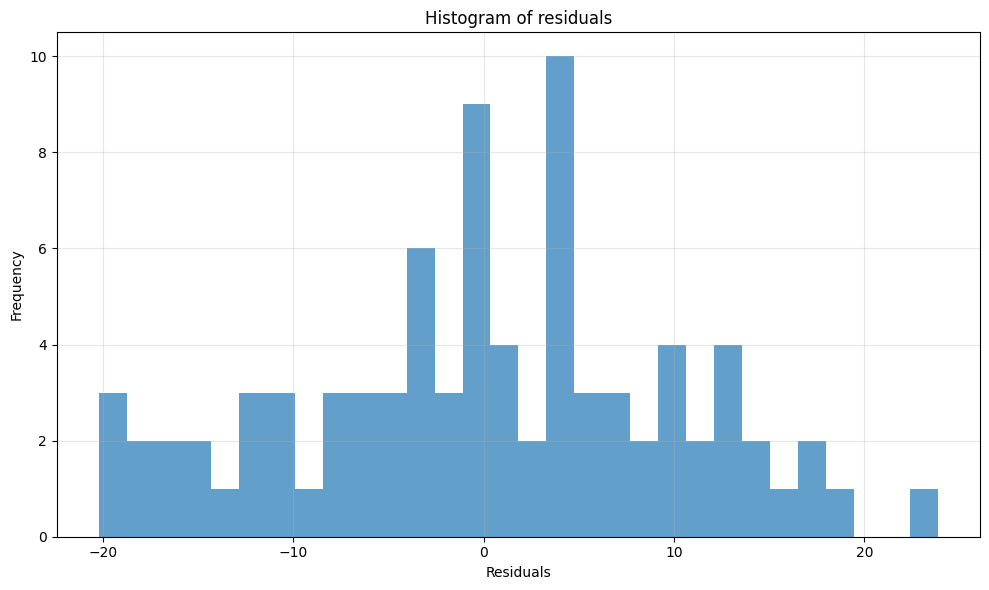

In [32]:
# residual histogram
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, alpha=0.7)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of residuals")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()